In [1]:
import pyramses
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset, zoomed_inset_axes)
import pandas as pd
import datetime

In [2]:
def get_measurements_central(f, rocof, old_level, nadir_reached, Tsample, hyst):
    w = ram.getObs('SYN', 'G', 'Omega')
    f.append(w[0]*50)
    new_nadir = False
    lim32 = 48.5
    lim21 = 49.5
    lim10 = 49.9
    lim01 = 50.1
    lim12 = 50.5
    lim23 = 51.5
    if not hyst:
        if f[-1] <= lim32:
            f_level = -3
        elif f[-1] <= lim21:
            f_level = -2
        elif f[-1] <= lim10:
            f_level = -1
        elif f[-1] < lim01:
            f_level = 0
        elif f[-1] < lim12:
            f_level = 1
        elif f[-1] < lim23:
            f_level = 2
        else: f_level = 3
    
    else:
        f_1 = f[-1]
        db = 0.05

        if old_level == -3:
            if f_1 <= lim32 + db:
                f_level = -3
            if f_1 <= lim21:
                f_level = -2
            elif f_1 <= lim10:
                f_level = -1
            elif f_1 < lim01:
                f_level = 0
            elif f_1 < lim12:
                f_level = 1
            elif f_1 < lim23:
                f_level = 2
            else:
                f_level = 3

        if old_level == -2:
            if f_1 <= lim32 - db:
                f_level = -3
            if f_1 <= lim21 + db:
                f_level = -2
            elif f_1 <= lim10:
                f_level = -1
            elif f_1 < lim01:
                f_level = 0
            elif f_1 < lim12:
                f_level = 1
            elif f_1 < lim23:
                f_level = 2
            else:
                f_level = 3

        if old_level == -1:
            if f_1 <= lim32:
                f_level = -3
            if f_1 <= lim21 - db:
                f_level = -2
            elif f_1 <= lim10 + db:
                f_level = -1
            elif f_1 < lim01:
                f_level = 0
            elif f_1 < lim12:
                f_level = 1
            elif f_1 < lim23:
                f_level = 2
            else:
                f_level = 3

        if old_level == 0:
            if f_1 <= lim32:
                f_level = -3
            if f_1 <= lim21:
                f_level = -2
            elif f_1 <= lim10 - db:
                f_level = -1
            elif f_1 < lim01 + db:
                f_level = 0
            elif f_1 < lim12:
                f_level = 1
            elif f_1 < lim23:
                f_level = 2
            else:
                f_level = 3

        if old_level == 1:
            if f_1 <= lim32:
                f_level = -3
            if f_1 <= lim21:
                f_level = -2
            elif f_1 <= lim10:
                f_level = -1
            elif f_1 < lim01 - db:
                f_level = 0
            elif f_1 < lim12 + db:
                f_level = 1
            elif f_1 < lim23:
                f_level = 2
            else:
                f_level = 3


        if old_level == 2:
            if f_1 <= lim32:
                f_level = -3
            if f_1 <= lim21:
                f_level = -2
            elif f_1 <= lim10:
                f_level = -1
            elif f_1 < lim01:
                f_level = 0
            elif f_1 < lim12 - db:
                f_level = 1
            elif f_1 < lim23 + db:
                f_level = 2
            else:
                f_level = 3

        if old_level == 3:
            if f_1 <= lim32:
                f_level = -3
            if f_1 <= lim21:
                f_level = -2
            elif f_1 <= lim10:
                f_level = -1
            elif f_1 < lim01:
                f_level = 0
            elif f_1 < lim12:
                f_level = 1
            elif f_1 < lim23 - db:
                f_level = 2
            else:
                f_level = 3
    
    
    roc01 = 0.3
    roc12 = 1.0
    roc23 = 1.5
    rocof.append((f[-1] - f[-2]) / Tsample)
    if rocof[-1] <= -roc23:
        r_level = -3
    elif rocof[-1] <= -roc12:
        r_level = -2
    elif rocof[-1] <= -roc01:
        r_level = -1
    elif rocof[-1] < roc01:
        r_level = 0
    elif rocof[-1] < roc12:
        r_level = 1
    elif rocof[-1] < roc23:
        r_level = 2
    else: r_level = 3
        
    worst_level = f_level if abs(f_level)>=abs(r_level) else r_level
    if rocof[-1] * rocof[-2] < -0.0001 or nadir_reached[-1] == True:
        new_nadir = True   
    
    if new_nadir == True:
        lvl = f_level
    else: 
        lvl = worst_level if abs(worst_level)>=abs(old_level) else old_level
    
    # return f_level, nadir_reached
    return lvl, new_nadir

def get_limits_atl(ATL): # having two functions we could use them at different frequencies.
    lim_v_min = ram.getObs('INJ', ATL, 'F_v_min')
    lim_v_max = ram.getObs('INJ', ATL, 'F_v_max')
    lim_p_min = ram.getObs('INJ', ATL, 'F_p_min')
    lim_p_max = ram.getObs('INJ', ATL, 'F_p_max')
    
    return int(lim_v_min[0]), int(lim_v_max[0]), int(lim_p_min[0]), int(lim_p_max[0])

def update_emergency_level(t, ATL, level_diff):
    ram.addDisturb(t, 'CHGPRM INJ ' + ATL + ' lvl ' + str(level_diff) + ' 0')
    # print( 'CHGPRM INJ ' + ATL + ' lvl ' + str(level_diff) + ' 0')
def update_nadir(t, ATL, nadir_diff):
    ram.addDisturb(t, 'CHGPRM INJ ' + ATL + ' nadir ' + str(2*nadir_diff) + ' 0')
def update_neighbourhood_help(t, ATL, v_diff, p_diff):
    ram.addDisturb(t, 'CHGPRM INJ ' + ATL + ' P_n ' + str(p_diff) + ' 0')
    ram.addDisturb(t, 'CHGPRM INJ ' + ATL + ' V_n ' + str(v_diff) + ' 0')
    # print( 'CHGPRM INJ ' + ATL + ' P_n ' + str(p_diff) + ' 0.1')

In [3]:
#Initial set points
# ram = pyramses.sim()
# ram = pyramses.sim(r"C:\Users\ctajoli\OneDrive - ETH Zurich\MA Carlo\URAMSES\URAMSES-1.2\URAMSES-1.2\Release_intel_w64")
# ram = pyramses.sim(r"C:\Users\Carlo\OneDrive - ETH Zurich\MA Carlo\URAMSES-copy\URAMSES-1.2\URAMSES-1.2\Release_intel_w64")
disturb = np.arange(0,-0.3,-0.05)
dist_r = []
dist_l = []
dist_f = []
for dist in disturb:

    ram = pyramses.sim(r"C:\Users\Carlo\OneDrive - ETH Zurich\MA Carlo\URAMSES-3.40c\Release_intel_w64")
    case = pyramses.cfg("cmd.txt")

    # store results, i is number of monte carlo simulation
    today = datetime.date.today() 
    out_dir = ".\\" +  str(today) 
    case.addTrj(out_dir+ "\out.trj")
    case.addOut(out_dir+ "\output.trace")

    ret = ram.execSim(case,0)


    event_time = 2
    # listofsyncs = ram.getAllCompNames("SYNC")

    # Islanding
    # ram.addDisturb(5.000, 'FAULT BUS N0 0 0')
    # ram.addDisturb(0.600, 'BREAKER BRANCH N10-N18 1 0')
    # ram.addDisturb(0.600, 'BREAKER BRANCH N4-N5 1 0')

    # Short circuit
    # ram.addDisturb(5.000, 'VFAULT BUS N10 0.8') # this does not work, it could be the version
    # ram.addDisturb(5.100, 'CLEAR BUS N10')

    # ram.addDisturb(0.5, 'FAULT BUS N1 0 0.1')
    # ram.addDisturb(2.5, 'CLEAR BUS N1')

    # Frequency event
    # ATL = 'TL11'
    # # p_diff = -1
    # ram.addDisturb(event_time, 'CHGPRM INJ L0 P0 -0.2 0.1')


    # ram.addDisturb(event_time+1, 'CHGPRM INJ ' + ATL + ' P_n ' + str(1) + ' 0')
    # ram.addDisturb(2, 'CHGPRM INJ L0 P0 -0.12 3')
    # ram.addDisturb(2, 'CHGPRM INJ L0 P0 -0.1 0.1')
    #ram.addDisturb(2, 'CHGPRM INJ L0 Q0 +0.1 0.1')

    # Test short circuit currents
    # ram.addDisturb(0.5, 'FAULT BUS N10 0 0.1')
    # ram.addDisturb(2.5, 'CLEAR BUS N10')  # units should disconnect, PVs reconnect after some time


    # ram.addDisturb(1, 'CLEAR BUS N10')    # if protection on, units should stay connected



    Thorizon = 10
    Tsample = 0.5

    # try:
    #     ret = ram.contSim(Thorizon) # Run simulation
    #     ram.endSim()
    # except:
    #     print(ram.getLastErr())

    LVloadlist = ['TL1', 'TL11', 'TL15', 'TL16', 'TL17', 'TL18'] 
    IBGS = ['PV11','PV15', 'PV16','PV17', 'PV18'] 
    level = [0]
    count_v = [0]
    count_p = [0]
    v_diff = [0]
    p_diff = [0]
    f = [50]
    rocof = [0]
    nadir_reached = [False]
    hyst = True

    for t in np.arange(0.5,Thorizon,Tsample):
        count_v_instant = 0
        count_p_instant = 0
        # Simulates until the next sampling point. If there is an error, then exit the loop printing the error.
        try:
            ram.contSim(t)
        except:
            print(ram.getLastErr())
            break
        if (event_time < t+Tsample) and (event_time >= t):
            ram.addDisturb(event_time, 'CHGPRM INJ L0 P0 ' + str(dist) +  ' 0.1')
        last_level, new_nadir = get_measurements_central(f, rocof, level[-1], nadir_reached, Tsample, hyst)
        level.append(last_level)
        level_diff = level[-1] - level[-2]
        nadir_reached.append(new_nadir)
        nadir_diff = nadir_reached[-1] - nadir_reached[-2]
        # count_v_old = count_v
        # count_p_old = count_p
        # print(nadir_reached[-1])
        # print(nadir_diff)
        for ATL in LVloadlist: # measure loop. LVloadlist must be all the laads for the given LV system, so they have to have the correct name 

            lim_v_min, lim_v_max, lim_p_min, lim_p_max = get_limits_atl(ATL)
            count_v_instant += lim_v_max - lim_v_min
            count_p_instant += lim_p_max - lim_p_min
        count_v.append(count_v_instant)
        count_p.append(count_p_instant)
        v_diff.append(count_v[-1] - count_v[-2])
        p_diff.append(count_p[-1] - count_p[-2])

        for ATL in LVloadlist: # update loop. separate because this way the count goes through all the LV before updating
            update_emergency_level(t+0.0001, ATL, level_diff)
            update_neighbourhood_help(t+0.0001, ATL, v_diff[-1], p_diff[-1])
        # for IBG in IBGS:
        #     update_nadir(t+0.0001, IBG, nadir_diff)
        #     update_neighbourhood_help(t+0.0001, IBG, v_diff[-1], p_diff[-1])
    ram.endSim()
    dist_r.append(max([abs(ele) for ele in rocof]))
    dist_f.append(min([abs(ele) for ele in f]))
    dist_l.append(max([abs(ele) for ele in level]))


48.44116458614155
-3.1176708277170206


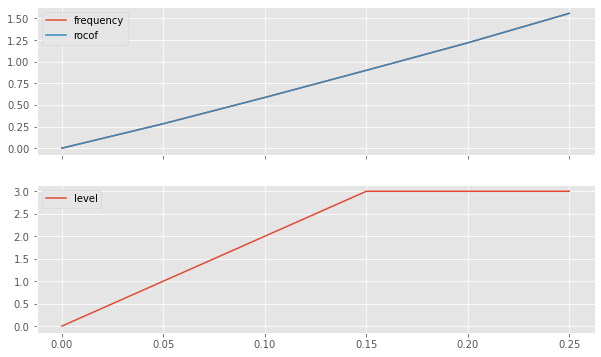

In [34]:
plt.style.use("ggplot")
fr = f
fig = plt.figure(None, (10,6))
(ax0, ax2) = fig.subplots(2,1, sharex = True)
dist_f1 = (-np.array(dist_f)+50)
dist_r1 = np.array(dist_r)*Tsample
ax0.plot(-disturb, dist_f1, label = 'frequency')
ax0.legend()
ax0.plot(-disturb, dist_r1, label = 'rocof')
ax0.legend()
ax2.plot(-disturb, dist_l, label = 'level')
ax2.legend()
print(fr[5])
print(rocof[5])